# TASK 4

<a name='000'></a>

<h2>Content</h2>

<ul>
    <ol type='1'>
    <li><a href='#001'>Logistic Regression Method</a></li>
    <li><a href='#002'>Gradient Descent Method</a></li>
    <li><a href='#003'>Stochastic Gradient Descent Method</a></li>
    <li><a href='#004'>Adam Optimization</a></li> 
    <li><a href='#005'>Plots of different learning rates</a></li>  
    <li><a href='#006'>Conclusions</a></li>
    </ol>
</ul>

In [1]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

<a name='001'></a>

<h2>Logistic Regression Method</h2>

In [2]:
df = pd.read_csv('C://Users//Daan_//Downloads//MLT-07 - MLP and Backpropagation//bioresponse.csv')
df.rename(str.lower, axis='columns', inplace=True)
df.head()

,activity,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d1767,d1768,d1769,d1770,d1771,d1772,d1773,d1774,d1775,d1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_set, test_set = train_test_split(df, test_size=0.25, shuffle=True)

#We split the data.
train_x = train_set.iloc[:, 1:].T.to_numpy()
train_y = train_set.iloc[:, :1].T.to_numpy()

test_x = test_set.iloc[:, 1:].T.to_numpy()
test_y = test_set.iloc[:, :1].T.to_numpy()

**Sigmoid**
$$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$$ 

In [4]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

**Initializing parameters**

In [5]:
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

**Implement a function propagate() that computes the cost function and its gradient.**

In [6]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    
    cost = -(1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)
    
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y, axis=1)
    
    grads = {'dw': dw, 'db': db}
    return grads, cost

**Implement the predict() function.**

In [7]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        if (A[0, i] <= 0.5):
            Y_prediction[0][i] = 0
        else:
            Y_prediction[0][i] = 1
    return Y_prediction

**Merge it all into a model.**

In [8]:
def model(X_train, Y_train, X_test, Y_test, optimizer, num_iterations=2000, learning_rate=0.5, print_cost=False):
    
    w, b = initialize_with_zeros(X_train.shape[0])
    
    parameters, grads, costs = optimizer(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters['w']
    b = parameters['b']
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    print('Train Accuracy: {:.0f}%'.format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print('Test Accuracy: {:.0f}%'.format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    output = {'costs': costs,
              'prediction_test': Y_prediction_test,
              'prediction_train': Y_prediction_train,
              'w': w,
              'b': b,
              'learning_rate': learning_rate,
              'num_iterations': num_iterations}
    return output

<a name='002'></a>

<h2>Gradient Descent Method</h2>

The **gradient descent method** is a fundamental technique in the field of machine learning and numerical optimization. Its goal is to find the minimum of a function, usually associated with the optimization of models in machine learning. 

**1. Basic Concept:** Gradient descent is an iterative algorithm that seeks to minimize a cost function. It starts with an initial value and iteratively adjusts that value in the direction in which the cost function decreases most rapidly, which is the negative direction of the gradient.

**2. Gradient:** The gradient is a vector that indicates the direction of greatest increase of the cost function. To minimize the function, we move in the opposite direction of the gradient.

**3. Learning Rate:** The learning rate is a critical hyperparameter in gradient descent. It determines the size of the steps we take in each iteration. Too large a learning rate can cause the algorithm to diverge, while too small a rate can cause it to converge slowly.

**4. Convergence:** gradient descent usually converges to a local or global minimum of the cost function, depending on the function and the initialization. It does not guarantee convergence to the global minimum in non-convex functions.

In summary, gradient descent is an essential technique in function optimization, and plays a central role in training machine learning models, such as neural networks and regressions. The choice of learning rate and the understanding of gradient descent variants are crucial for successful model optimization.

In [9]:
def GD(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w -= learning_rate * dw
        b -= learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost[0])
        
        if print_cost and i % 100 == 0:
            print('Cost after {} iteration: {:.4f}'.format(i, cost[0]))
    
    params = {'w': w, 'b': b}
    grads = {'dw': dw, 'db': db}
    return params, grads, costs

<a name='003'></a>

<h2>Stochastic Gradient Descent Method</h2>

**Stochastic gradient descent**, known as SGD , is a variant of the gradient descent method that is widely used in training machine learning models, especially on large data sets. 

**1. Stochastic Approach:** Unlike conventional gradient descent, which uses the entire dataset in each iteration, SGD operates more efficiently. At each iteration, it takes a random sample (a single example or a small batch of examples) from the data set to calculate the gradient and adjust the model parameters.

**2. Convergence Speed:** SGD can converge faster than conventional gradient descent on large data sets, as each iteration is faster due to the use of random samples. However, this randomness can lead to noisier convergence, which requires careful tuning of the learning rate.

**3. Dynamic Learning Rate:** In DMS, the learning rate can be adaptive. This means that the learning rate can change during training, which helps to improve convergence and avoid problems such as divergence.

**4. Generalization:** Often, DGS can help to obtain better generalization compared to batch gradient descent. This is because randomization in sample selection can prevent the model from overfitting to the training set.

**5. Applications:** SGD is used in a wide variety of machine learning algorithms, including neural networks, linear regressions, and support vector machine (SVM) models, among others.

**6. Convergence Noise:** A disadvantage of SGD is that convergence can be noisy due to randomness in sample selection. However, this variability can be controlled to some extent by techniques such as exponential moving average.

In summary, stochastic gradient descent (SGD) is an efficient and widely used technique in training machine learning models on large data sets. Although it can converge faster, it requires careful tuning of the learning rate and can generate noisier convergence compared to batch gradient descent.

In [10]:
def SGD(w, b, X, Y, num_iterations, learning_rate, print_cost=False, batch_size=64):
    costs = []
    
    for i in range(num_iterations):
        for start in range(0, X.shape[1], batch_size):
            stop = start + batch_size
            
            X_batch = X[:, start:stop]
            Y_batch = Y[:, start:stop]
            
            grads, cost = propagate(w, b, X_batch, Y_batch)
            
            dw = grads['dw']
            db = grads['db']
            
            w -= learning_rate * dw
            b -= learning_rate * db
        
        _, cost = propagate(w, b, X, Y)
        if i % 100 == 0:
            costs.append(cost[0])
        
        if print_cost and i % 100 == 0:
            print('Cost after {} iteration: {:.4f}'.format(i, cost[0]))
    
    params = {'w': w, 'b': b}
    grads = {'dw': dw, 'db': db}
    return params, grads, costs

<a name='004'></a>

<h2>Adam Optimization</h2>

**Adam** (Adaptive Moment Estimation) is an optimization algorithm widely used in training machine learning models, particularly in neural networks. It was proposed by Diederik P. Kingma and Jimmy Ba in 2014. Adam combines elements of stochastic gradient descent (SGD) with other optimization methods and is characterized by the following features:

**1. Learning rate adaptation:** Adam adapts the learning rate individually for each model parameter. This means that for each parameter, the learning rate can be different, which helps to avoid convergence and hyperparameter tuning problems.

**2. Second Order Adaptation:** Adam also maintains a moving average of the squares of past gradients, which resembles second-order adaptation. This helps to control the convergence speed and learning rate more accurately.

**3. Regularization:** Adam includes a form of regularization called "weight decay" that penalizes large weights, which helps prevent overfitting.

**4. Effectiveness in Practice:** Adam has proven to be effective in practice on a wide variety of machine learning tasks, and is widely used in training deep neural networks due to its ability to handle adaptive learning rates and fast convergence.

**5. Reasonable Default Hyperparameters:** Adam often works well with a default hyperparameter setting, which simplifies hyperparameter tuning compared to other algorithms.

Despite its advantages, Adam is not the perfect solution for all optimization problems. In some cases, other algorithms, such as SGD with learning rate scheduling, can outperform Adam. The choice of optimization algorithm ultimately depends on the specific problem and model architecture, and it is sometimes necessary to experiment with several algorithms to determine which one works best.


In [11]:
def Adam(w, b, X, Y, num_iterations, learning_rate, print_cost=False, beta1=0.9, beta2=0.999, bias=0.00000001):
    costs = []
    moment_b1_w = 0
    moment_b2_w = 0
    moment_b1_b = 0
    moment_b2_b = 0
    iteration = 1
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads['dw']
        db = grads['db']
        
        moment_b1_w = (beta1 * moment_b1_w) + ((1 - beta1) * dw)
        moment_b1_b = (beta1 * moment_b1_b) + ((1 - beta1) * db)
        
        moment_b2_w = (beta2 * moment_b2_w) + ((1 - beta2) * (dw ** 2))
        moment_b2_b = (beta2 * moment_b2_b) + ((1 - beta2) * (db ** 2))
        
        biased_b1_w = moment_b1_w / (1 - np.power(beta1, iteration))
        biased_b1_b = moment_b1_b / (1 - np.power(beta1, iteration))
        biased_b2_w = moment_b2_w / (1 - np.power(beta1, iteration))
        biased_b2_b = moment_b2_b / (1 - np.power(beta1, iteration))
        
        w -= learning_rate * biased_b1_w / (np.sqrt(biased_b2_w) + bias)
        b -= learning_rate * biased_b1_b / (np.sqrt(biased_b2_b) + bias)
        
        if i % 100 == 0:
            costs.append(cost[0])
        
        if print_cost and i % 100 == 0:
            print('Cost after {} iteration: {:.4f}'.format(i, cost[0]))
        iteration = iteration + 1
    
    params = {'w': w, 'b': b}
    grads = {'dw': dw, 'db': db}
    return params, grads, costs

<a name='005'></a>

<h2>Plots of different learning rates </h2>

The **learning rate** is a crucial hyperparameter in the training of machine learning models. It determines the size of the steps taken during the optimization process, such as gradient descent, and plays a key role in model convergence and performance. Here are some key points about learning rates:

**1. Definition:** The learning rate is a positive scalar value that controls how much the model parameters are adjusted at each iteration during optimization.

**2. Importance of the Learning Rate:** The proper choice of the learning rate is critical. Too high a rate can cause the optimization algorithm to diverge, while too low a rate can lead to slow convergence.

**3. Hyperparameter Tuning:** In practice, the choice of learning rate often requires a hyperparameter tuning process. This involves trying different learning rate values in conjunction with other hyperparameters to find the optimal setting.

**4. Constant vs. Dynamic Learning Rate:** The learning rate can be constant throughout training or dynamically adjusted. Dynamic learning rates, such as learning rate decay, can be beneficial to improve convergence and avoid problems such as stalling.

**5. Regularization and Learning Rate:** The choice of learning rate is also related to regularization. In regular models such as L1 and L2 regression, the learning rate and the regularization term are fitted together.

**6. Fading or Exploding Gradient Problems:** In deep neural network models, learning rates can influence fading gradient (if too small) or exploding gradient (if too large) problems. The choice of learning rate is crucial to address these problems.

**7. Hyperparameter Search Methods:** Techniques such as grid search, random search and Bayesian optimization are used to find the optimal learning rate along with other hyperparameters.

In summary, learning rate is a critical hyperparameter in training machine learning models. Proper choice of learning rate is essential for efficient convergence and good model optimization results. Experimenting with different values and dynamic tuning techniques is common in hyperparameter tuning. 

In [12]:
def plot_learning(a, b, c):
    figure, ax = plt.subplots(1, 3, figsize=(20, 5))
    sns.set_theme(style='darkgrid', palette='muted')
    
    ax[0] = sns.lineplot(data=a, ax=ax[0], color="red")
    ax[0].set(xlabel='Iteration')
    ax[0].set(ylabel='Loss')
    ax[0].set_title('Gradient Descent')
    
    ax[1] = sns.lineplot(data=b, ax=ax[1],color="blue")
    ax[1].set(xlabel='Iteration')
    ax[1].set(ylabel='Loss')
    ax[1].set_title('Stochastic Gradient Descent')
    
    ax[2] = sns.lineplot(data=c, ax=ax[2],color="green")
    ax[2].set(xlabel='Iteration')
    ax[2].set(ylabel='Loss')
    ax[2].set_title('Adam Optimization')
    
    plt.show()

------------------ 
learning rate: 0.004
------------------ 
Gradient Descent:
Train Accuracy: 76%
Test Accuracy: 75%

Stochastic Gradient Descent:
Train Accuracy: 85%
Test Accuracy: 76%

Adam Optimization:
Train Accuracy: 92%
Test Accuracy: 75%


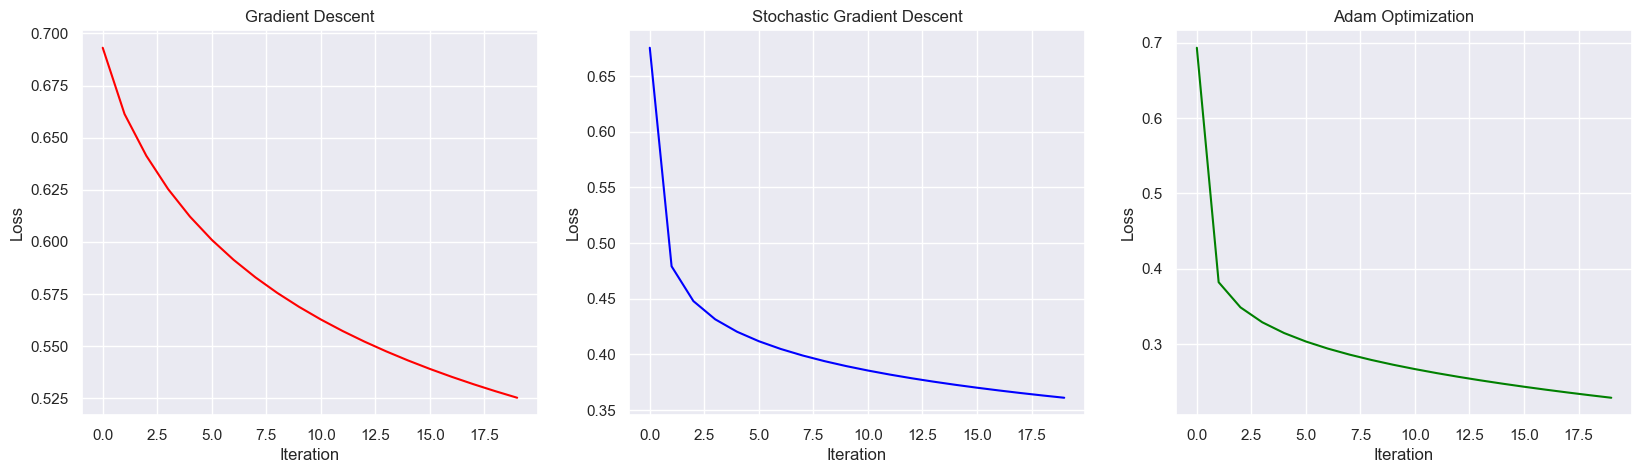

In [23]:
print("------------------ ")
learning=0.004
print(f'learning rate: {learning}')
print("------------------ ")
print('Gradient Descent:')
output_gd = model(train_x, train_y, test_x, test_y, optimizer=GD, learning_rate=learning, print_cost=False)
print()
print('Stochastic Gradient Descent:')
output_sgd = model(train_x, train_y, test_x, test_y, optimizer=SGD, learning_rate=learning, print_cost=False)
print()
print('Adam Optimization:')
output_adam = model(train_x, train_y, test_x, test_y, optimizer=Adam, learning_rate=learning, print_cost=False)

plot_learning(output_gd['costs'], output_sgd['costs'], output_adam['costs'])

------------------ 
learning rate: 0.008
------------------ 
Gradient Descent:
Train Accuracy: 78%
Test Accuracy: 76%

Stochastic Gradient Descent:
Train Accuracy: 86%
Test Accuracy: 76%

Adam Optimization:
Train Accuracy: 93%
Test Accuracy: 75%


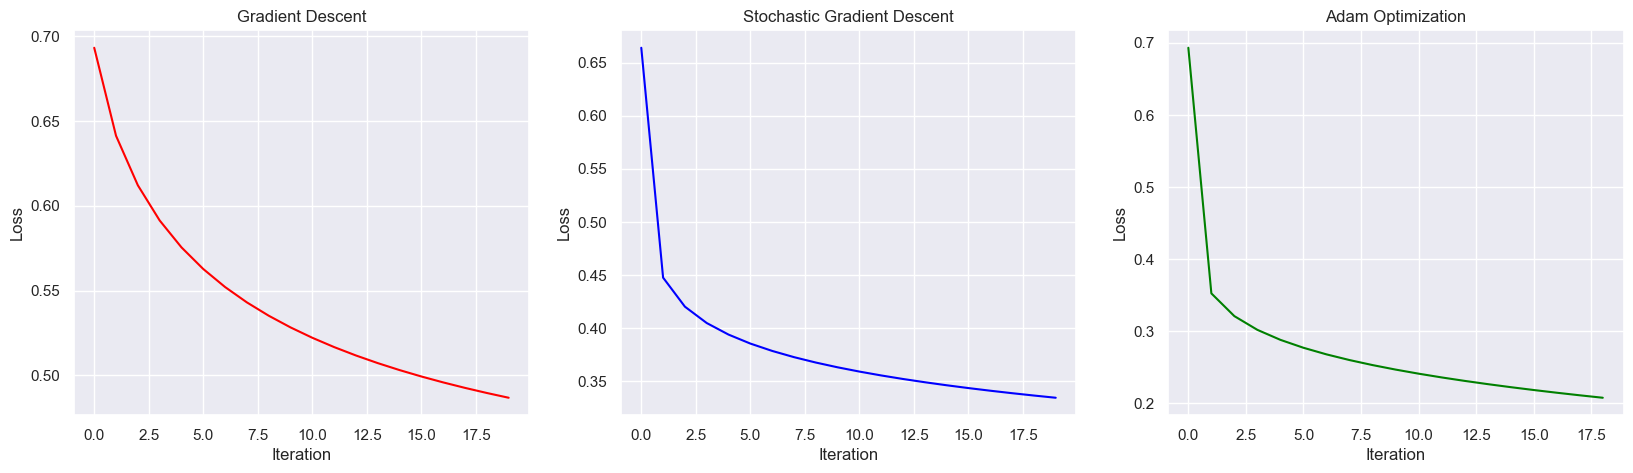

In [22]:
print("------------------ ")
learning=0.008
print(f'learning rate: {learning}')
print("------------------ ")
print('Gradient Descent:')
output_gd = model(train_x, train_y, test_x, test_y, optimizer=GD, learning_rate=learning, print_cost=False)
print()
print('Stochastic Gradient Descent:')
output_sgd = model(train_x, train_y, test_x, test_y, optimizer=SGD, learning_rate=learning, print_cost=False)
print()
print('Adam Optimization:')
output_adam = model(train_x, train_y, test_x, test_y, optimizer=Adam, learning_rate=learning, print_cost=False)

plot_learning(output_gd['costs'], output_sgd['costs'], output_adam['costs'])

------------------ 
learning rate: 0.012
------------------ 
Gradient Descent:
Train Accuracy: 79%
Test Accuracy: 77%

Stochastic Gradient Descent:
Train Accuracy: 87%
Test Accuracy: 75%

Adam Optimization:
Train Accuracy: 94%
Test Accuracy: 75%


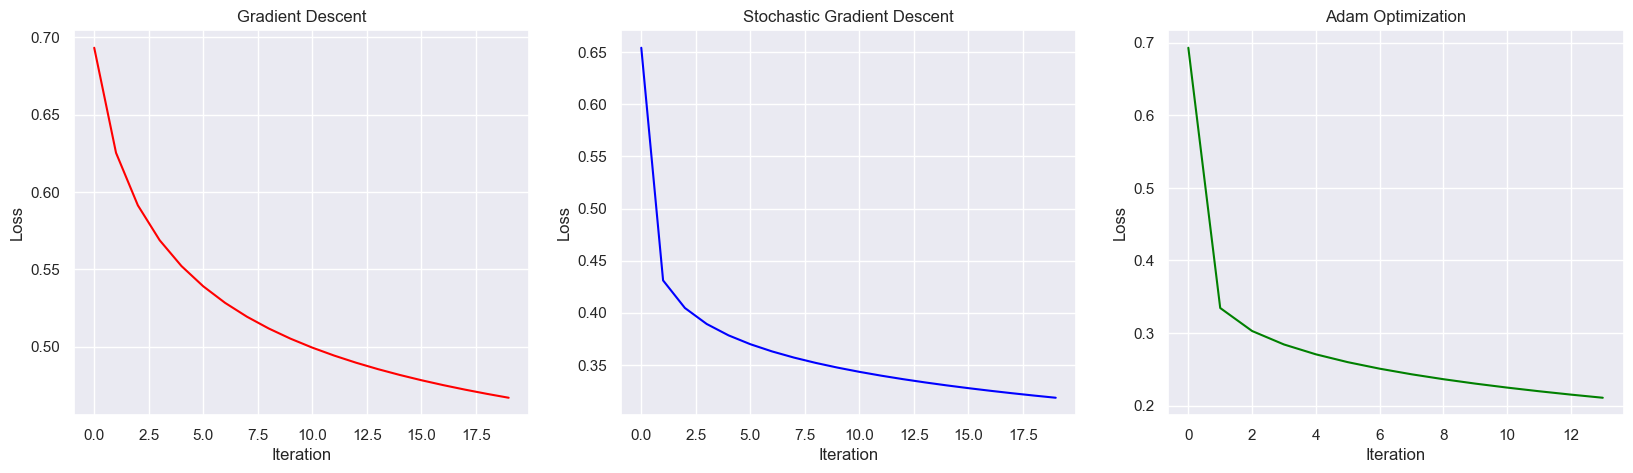

In [21]:
print("------------------ ")
learning=0.012
print(f'learning rate: {learning}')
print("------------------ ")
print('Gradient Descent:')
output_gd = model(train_x, train_y, test_x, test_y, optimizer=GD, learning_rate=learning, print_cost=False)
print()
print('Stochastic Gradient Descent:')
output_sgd = model(train_x, train_y, test_x, test_y, optimizer=SGD, learning_rate=learning, print_cost=False)
print()
print('Adam Optimization:')
output_adam = model(train_x, train_y, test_x, test_y, optimizer=Adam, learning_rate=learning, print_cost=False)

plot_learning(output_gd['costs'], output_sgd['costs'], output_adam['costs'])

------------------ 
learning rate: 0.016
------------------ 
Gradient Descent:
Train Accuracy: 80%
Test Accuracy: 77%

Stochastic Gradient Descent:
Train Accuracy: 87%
Test Accuracy: 75%

Adam Optimization:
Train Accuracy: 94%
Test Accuracy: 75%


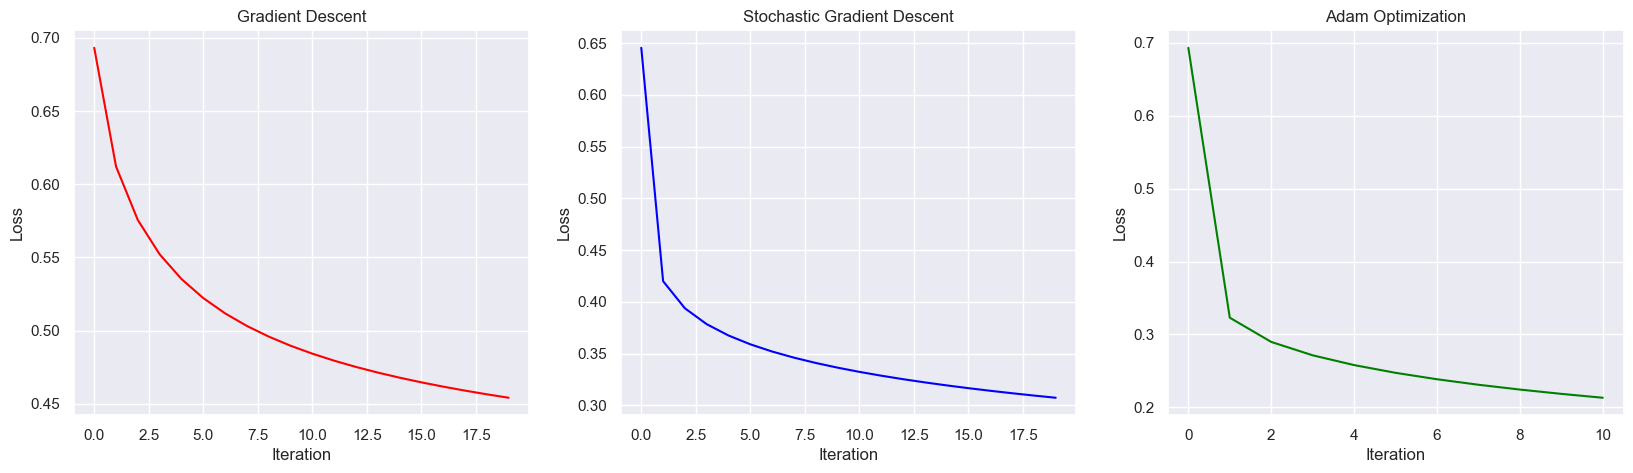

In [20]:
print("------------------ ")
learning=0.016
print(f'learning rate: {learning}')
print("------------------ ")
print('Gradient Descent:')
output_gd = model(train_x, train_y, test_x, test_y, optimizer=GD, learning_rate=learning, print_cost=False)
print()
print('Stochastic Gradient Descent:')
output_sgd = model(train_x, train_y, test_x, test_y, optimizer=SGD, learning_rate=learning, print_cost=False)
print()
print('Adam Optimization:')
output_adam = model(train_x, train_y, test_x, test_y, optimizer=Adam, learning_rate=learning, print_cost=False)

plot_learning(output_gd['costs'], output_sgd['costs'], output_adam['costs'])

------------------ 
learning rate: 0.02
------------------ 
Gradient Descent:
Train Accuracy: 80%
Test Accuracy: 77%

Stochastic Gradient Descent:
Train Accuracy: 88%
Test Accuracy: 75%

Adam Optimization:
Train Accuracy: 94%
Test Accuracy: 74%


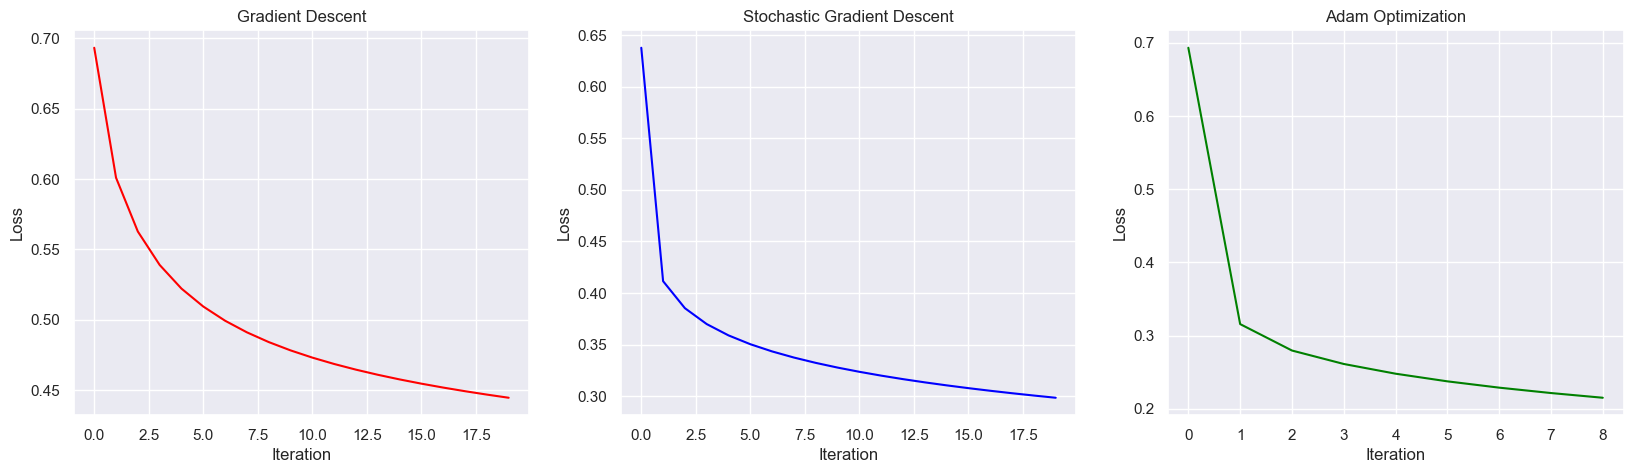

In [19]:
print("------------------ ")
learning=0.02
print(f'learning rate: {learning}')
print("------------------ ")
print('Gradient Descent:')
output_gd = model(train_x, train_y, test_x, test_y, optimizer=GD, learning_rate=learning, print_cost=False)
print()
print('Stochastic Gradient Descent:')
output_sgd = model(train_x, train_y, test_x, test_y, optimizer=SGD, learning_rate=learning, print_cost=False)
print()
print('Adam Optimization:')
output_adam = model(train_x, train_y, test_x, test_y, optimizer=Adam, learning_rate=learning, print_cost=False)

plot_learning(output_gd['costs'], output_sgd['costs'], output_adam['costs'])

<a name='006'></a>

<h2>Conclusions </h2>

`Gradient Descent optimization` algorithm showed best results on the test set with **learning rate** of **0.016** and **0.02**.

`Stochastic Gradient Descent optimization` algorithm showed best results on the test set with **learning rate** of **0.008**.

`Adam's optimization algorithm` showed best results on the test set with **learning rate** of **0.012** and **0.016**.

With these learning rates, we see that the **ADAM** method performed better than the other two, also performs **fewer iterations** than the other two methods.